## Chargement

In [ ]:
!pip install seaborn
# !pip install pandas matplplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Chargement du Master Dataset
# Attention au chemin : le notebook est dans /notebooks, le fichier est dans /data_processed
df = pd.read_parquet("../data_processed/energy_dataset_master.parquet")

# Vérification
print(f"Période couverte : du {df['datetime_utc'].min()} au {df['datetime_utc'].max()}")
df.head()

Période couverte : du 2022-01-01 00:00:00 au 2024-01-01 00:00:00


,datetime_utc,demand_mwh,year,month,temp_houston,temp_los_angeles,temp_new_york
0,2022-01-01 00:00:00,459742,2022,1,23.2,13.0,8.4
1,2022-01-01 01:00:00,457338,2022,1,22.8,12.1,9.2
2,2022-01-01 02:00:00,449030,2022,1,23.2,11.6,8.0
3,2022-01-01 03:00:00,436049,2022,1,23.6,11.3,8.1
4,2022-01-01 04:00:00,421312,2022,1,23.2,9.8,7.7


## Visualisation de la consommation dans le temps


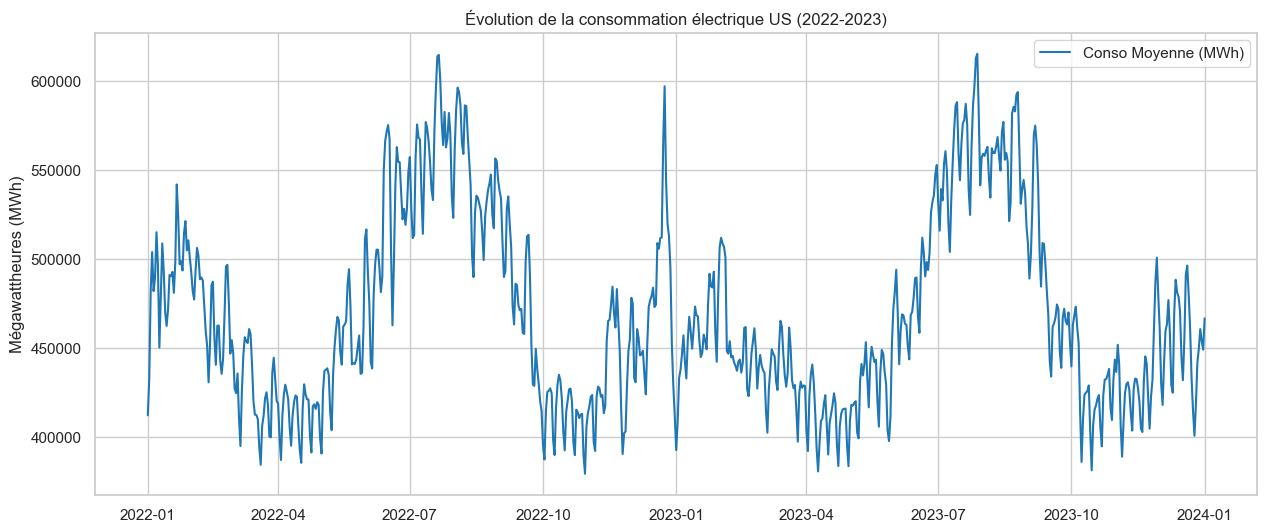

In [2]:
# On ré-échantillonne par jour pour y voir plus clair (Moyenne journalière)
df_daily = df.set_index('datetime_utc').resample('D').mean()

plt.figure(figsize=(15, 6))
plt.plot(df_daily.index, df_daily['demand_mwh'], label='Conso Moyenne (MWh)', color='tab:blue')
plt.title("Évolution de la consommation électrique US (2022-2023)")
plt.ylabel("Mégawattheures (MWh)")
plt.legend()
plt.show()

## La Matrice de Corrélation (Heatmap)


- Si le chiffre est proche de 1 : Quand la température monte, la conso monte (Climatisation).
- Si le chiffre est proche de -1 : Quand la température monte, la conso baisse (Chauffage).
- Si c'est proche de 0 : Pas de lien.


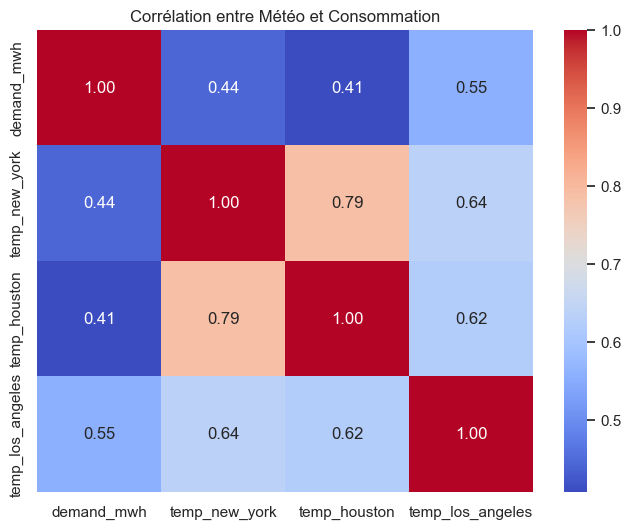

In [3]:
# On calcule la corrélation entre toutes les colonnes numériques
corr = df[['demand_mwh', 'temp_new_york', 'temp_houston', 'temp_los_angeles']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre Météo et Consommation")
plt.show()


## Le Scatter Plot (Nuage de points)


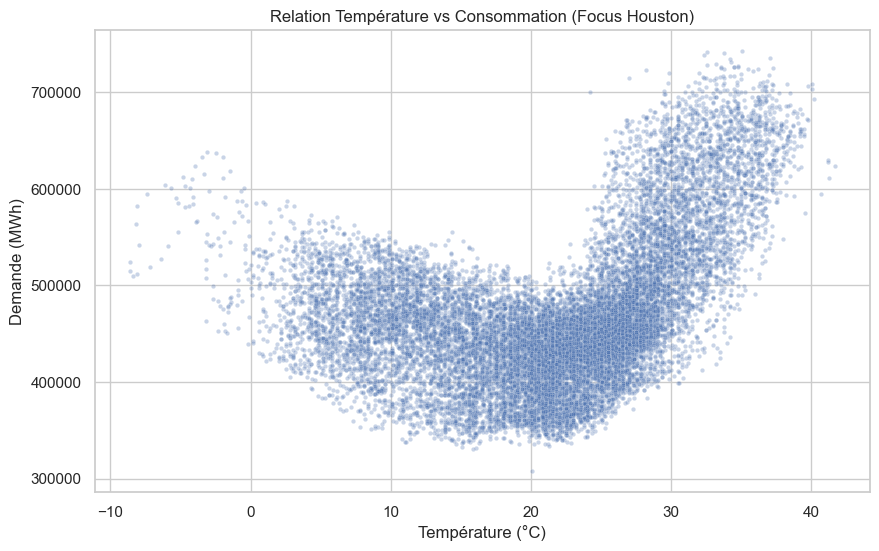

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['temp_houston'], y=df['demand_mwh'], alpha=0.3, s=10)
plt.title("Relation Température vs Consommation (Focus Houston)")
plt.xlabel("Température (°C)")
plt.ylabel("Demande (MWh)")
plt.show()
